In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.svm import SVR
import seaborn as sns

In [2]:
df=pd.read_csv('attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Workmode,Appreciation,Toxic culture,Bad Hiring process
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,6,4,0,5,Hybrid,Negative,not prone,Good
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,Onsite,Positive,not prone,Good
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,Hybrid,Negative,not prone,Good
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,8,7,3,0,Onsite,Negative,not prone,Good
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,2,2,2,2,Hybrid,Negative,not prone,Good


In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.062585,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.108247,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,0.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
#check unique values in the column
print(df.apply(lambda col: col.unique().sum()))

Age                                                                      1677
Attrition                                                               YesNo
BusinessTravel                       Travel_RarelyTravel_FrequentlyNon-Travel
DailyRate                                                              710161
Department                         SalesResearch & DevelopmentHuman Resources
DistanceFromHome                                                          435
Education                                                                  15
EducationField              Life SciencesOtherMedicalMarketingTechnical De...
EmployeeCount                                                               1
EmployeeNumber                                                        1506552
EnvironmentSatisfaction                                                    10
Gender                                                             FemaleMale
HourlyRate                                                      

C:\Users\DELL\AppData\Local\Temp\ipykernel_18864\909522707.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(25, 25))


<Figure size 2500x2500 with 0 Axes>

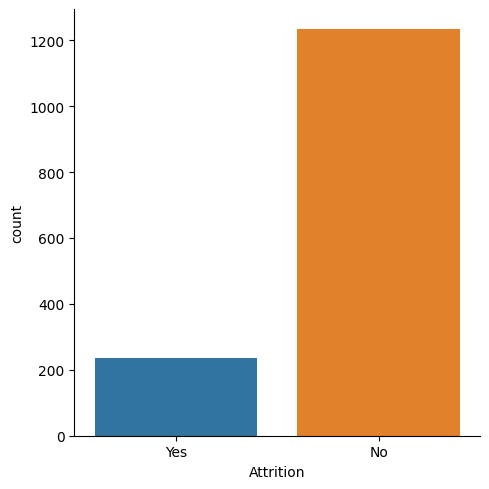

<Figure size 2500x2500 with 0 Axes>

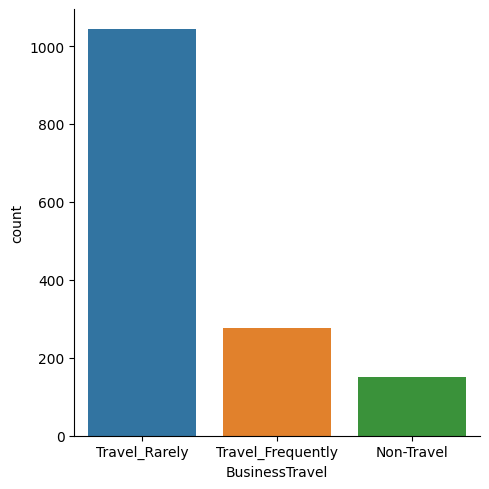

<Figure size 2500x2500 with 0 Axes>

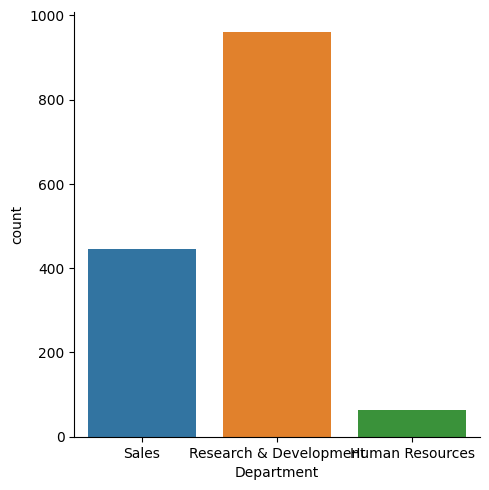

<Figure size 2500x2500 with 0 Axes>

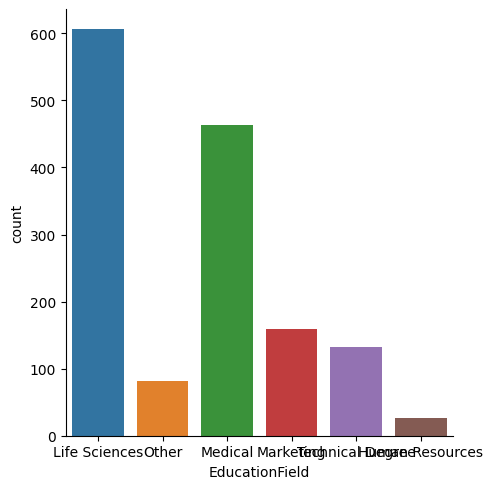

<Figure size 2500x2500 with 0 Axes>

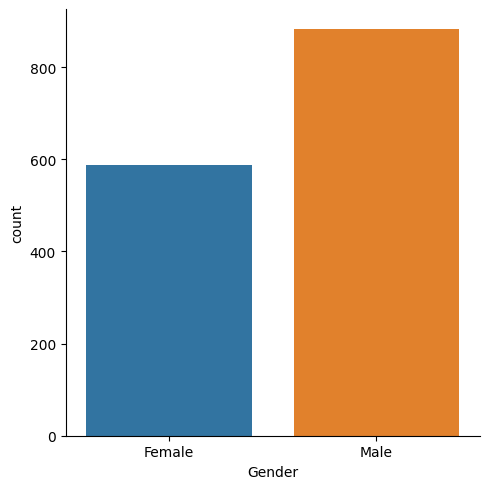

<Figure size 2500x2500 with 0 Axes>

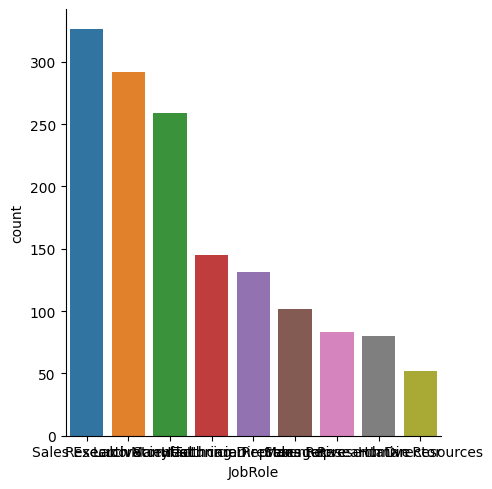

<Figure size 2500x2500 with 0 Axes>

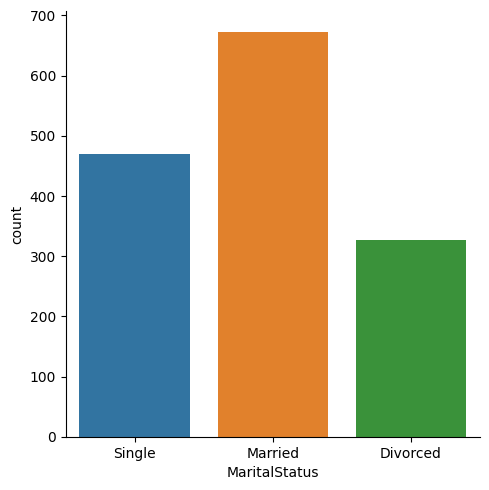

<Figure size 2500x2500 with 0 Axes>

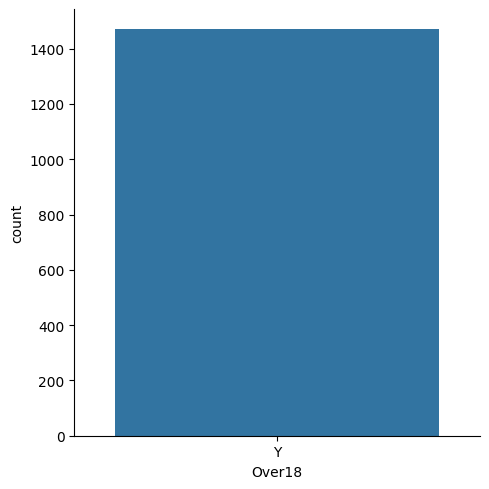

<Figure size 2500x2500 with 0 Axes>

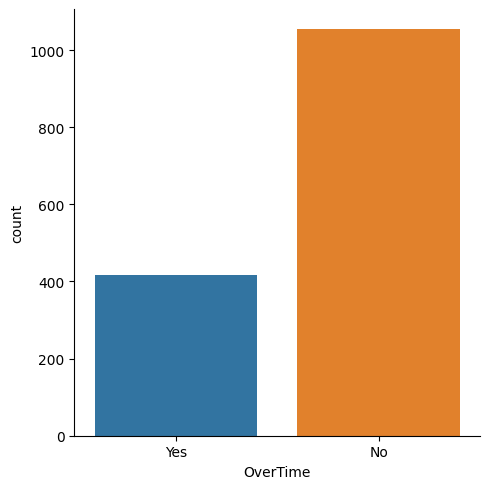

<Figure size 2500x2500 with 0 Axes>

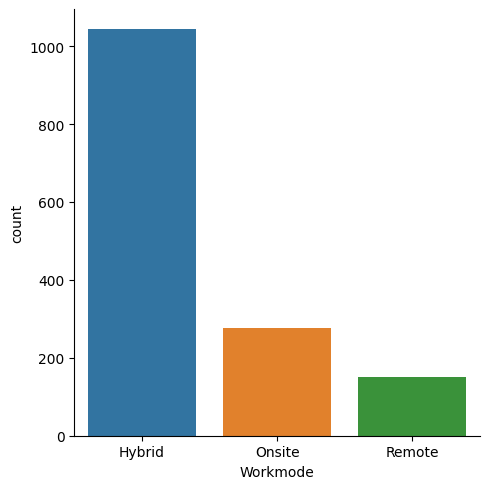

<Figure size 2500x2500 with 0 Axes>

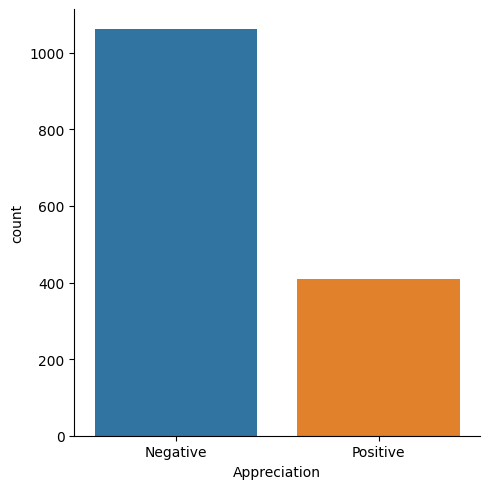

<Figure size 2500x2500 with 0 Axes>

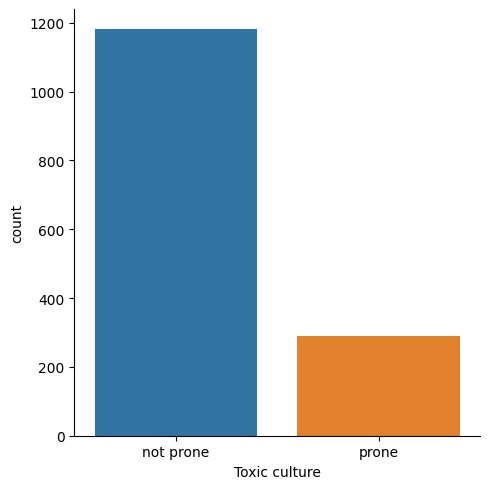

<Figure size 2500x2500 with 0 Axes>

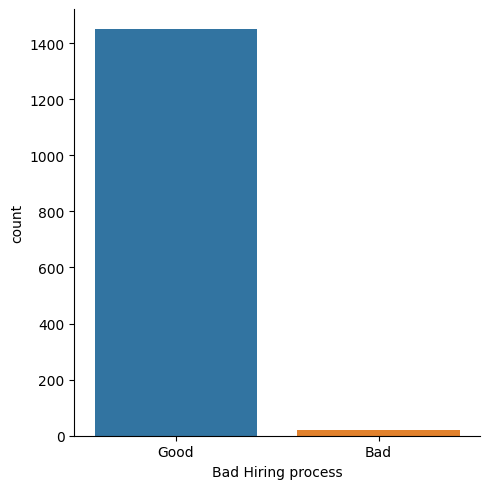

In [6]:
cat_df=df.select_dtypes(include='object')

for i in cat_df:
    plt.figure(figsize=(25, 25))
    sns.catplot(data=df,x=i,kind='count')

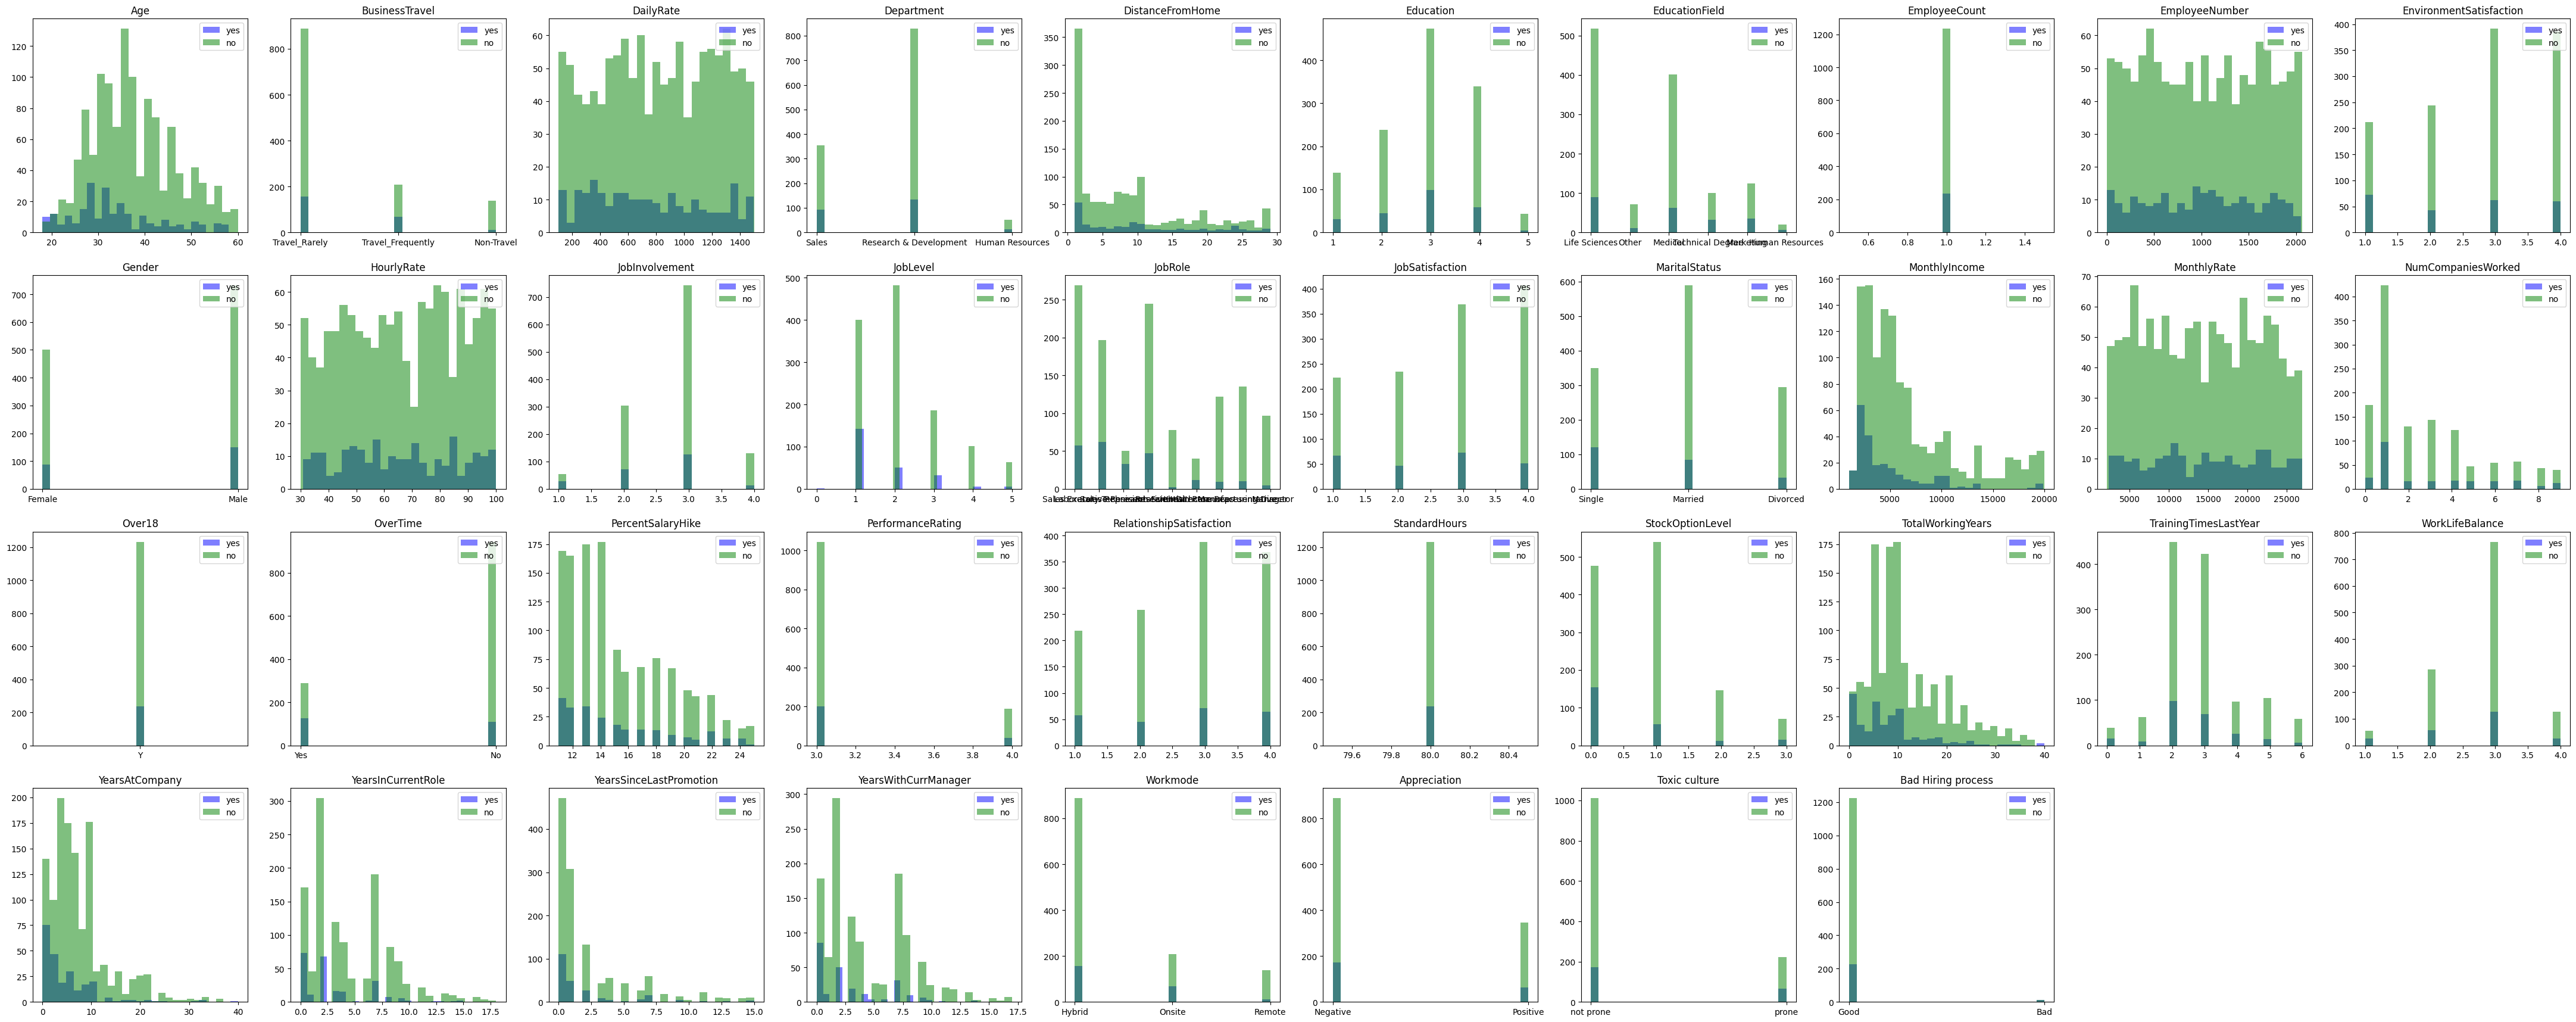

In [7]:

#plot distributions
k=1
plt.figure(figsize=(55, 55))
for col in df:
  if col=="Attrition":
    continue
  yes = df[df['Attrition'] == 'Yes'][col]
  no = df[df['Attrition'] == 'No'][col]
  plt.subplot(10, 10, k)
  plt.hist(yes, bins=25, alpha=0.5, label='yes', color='b')
  plt.hist(no, bins=25, alpha=0.5, label='no', color='g')
  plt.legend(loc='upper right')
  plt.title(col)
  k+=1

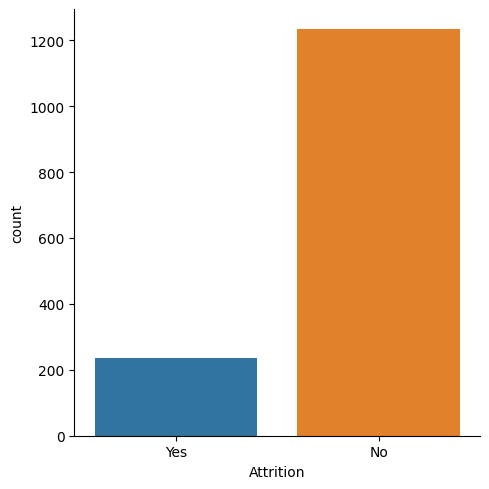

In [8]:
sns.catplot(data=df,x="Attrition",kind='count')

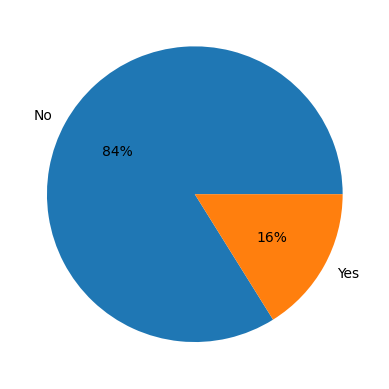

In [9]:
# colors = sns.color_palette("husl", 2)
plt.pie(df['Attrition'].value_counts(),labels=['No','Yes'],autopct='%.0f%%')
plt.show()

Text(0.5, 1.0, 'Stacked Bar Chart of JobSatisfaction vs attrition')

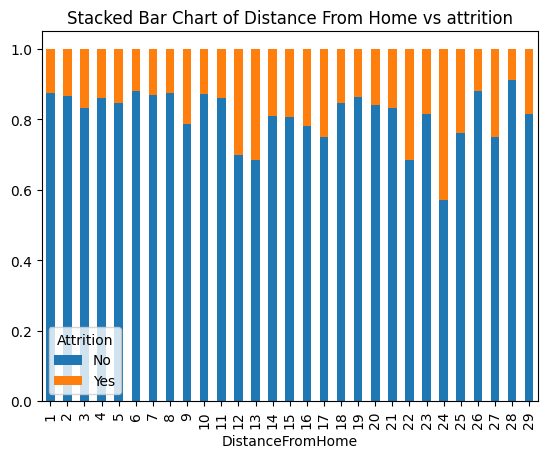

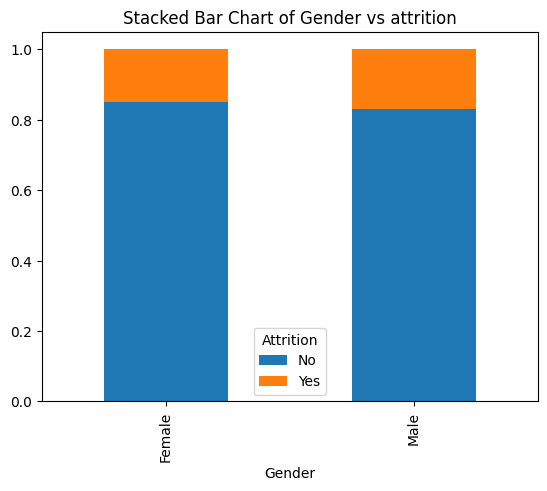

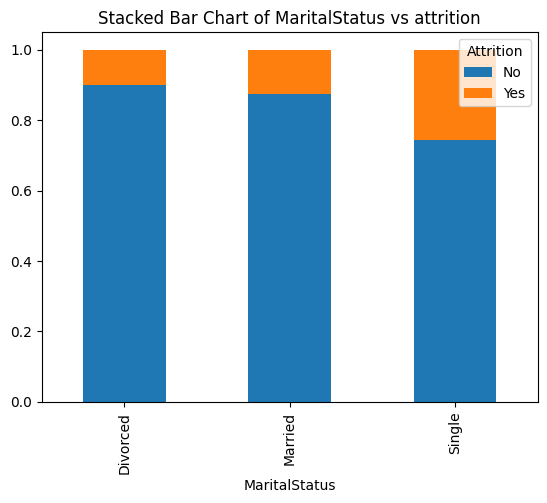

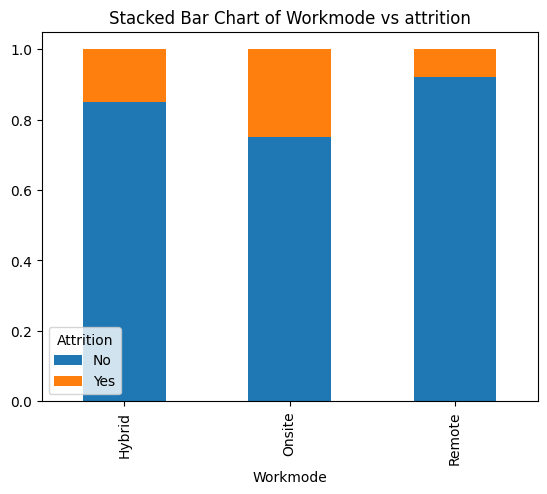

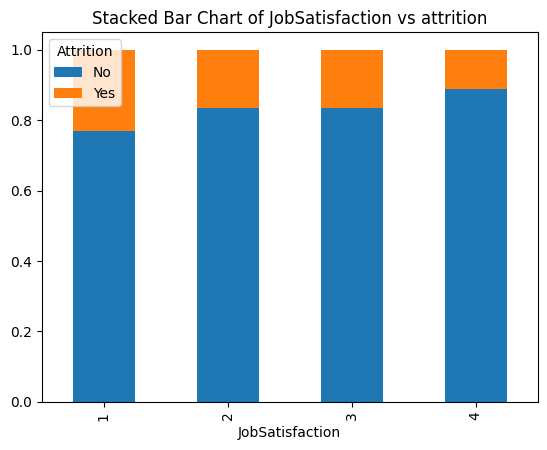

In [10]:
table=pd.crosstab(df.DistanceFromHome, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Distance From Home vs attrition')

table=pd.crosstab(df.Gender, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs attrition')

table=pd.crosstab(df.MaritalStatus, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of MaritalStatus vs attrition')

table=pd.crosstab(df.Workmode, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Workmode vs attrition')


table=pd.crosstab(df.JobSatisfaction, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of JobSatisfaction vs attrition')


Text(0.5, 1.0, 'Stacked Bar Chart of Overtime vs attrition')

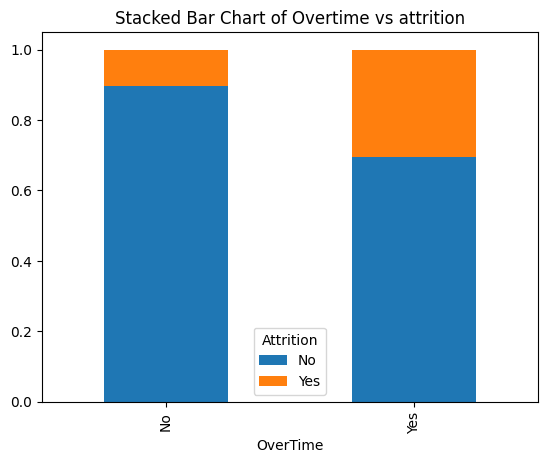

In [11]:
table=pd.crosstab(df.OverTime, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Overtime vs attrition')

Text(0.5, 1.0, 'Stacked Bar Chart of Business Travel vs attrition')

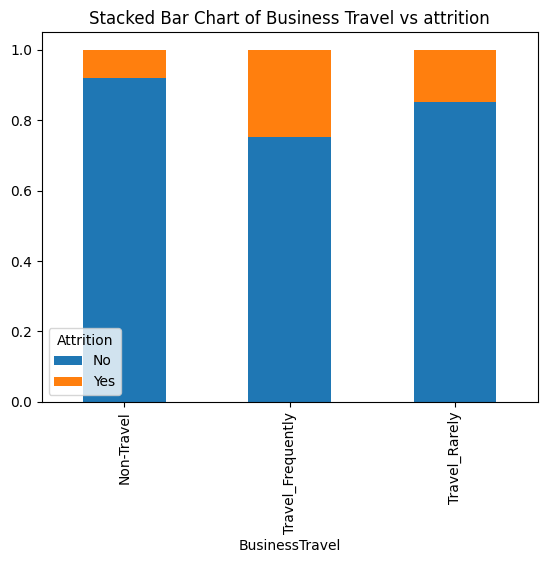

In [12]:
table=pd.crosstab(df.BusinessTravel, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Business Travel vs attrition')

Text(0.5, 1.0, 'Stacked Bar Chart of Business Travel vs attrition')

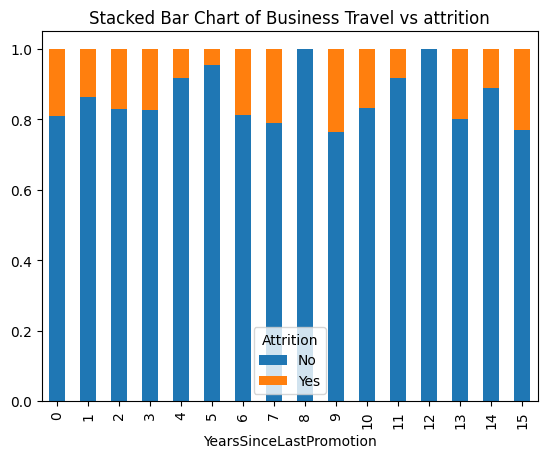

In [13]:
table=pd.crosstab(df.YearsSinceLastPromotion, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Business Travel vs attrition')

<AxesSubplot:xlabel='Workmode', ylabel='count'>

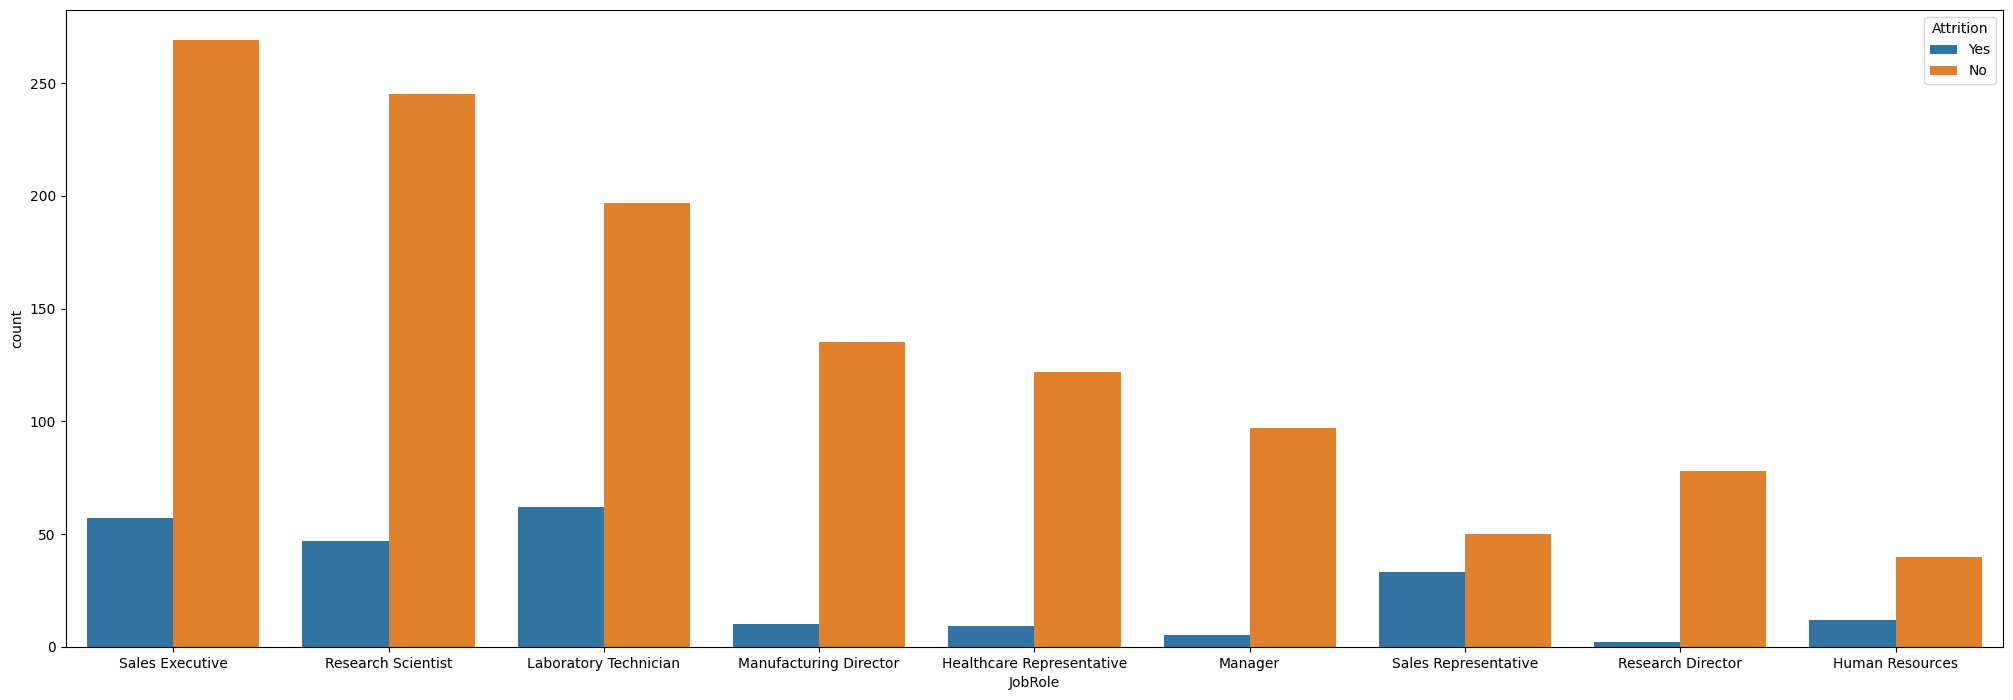

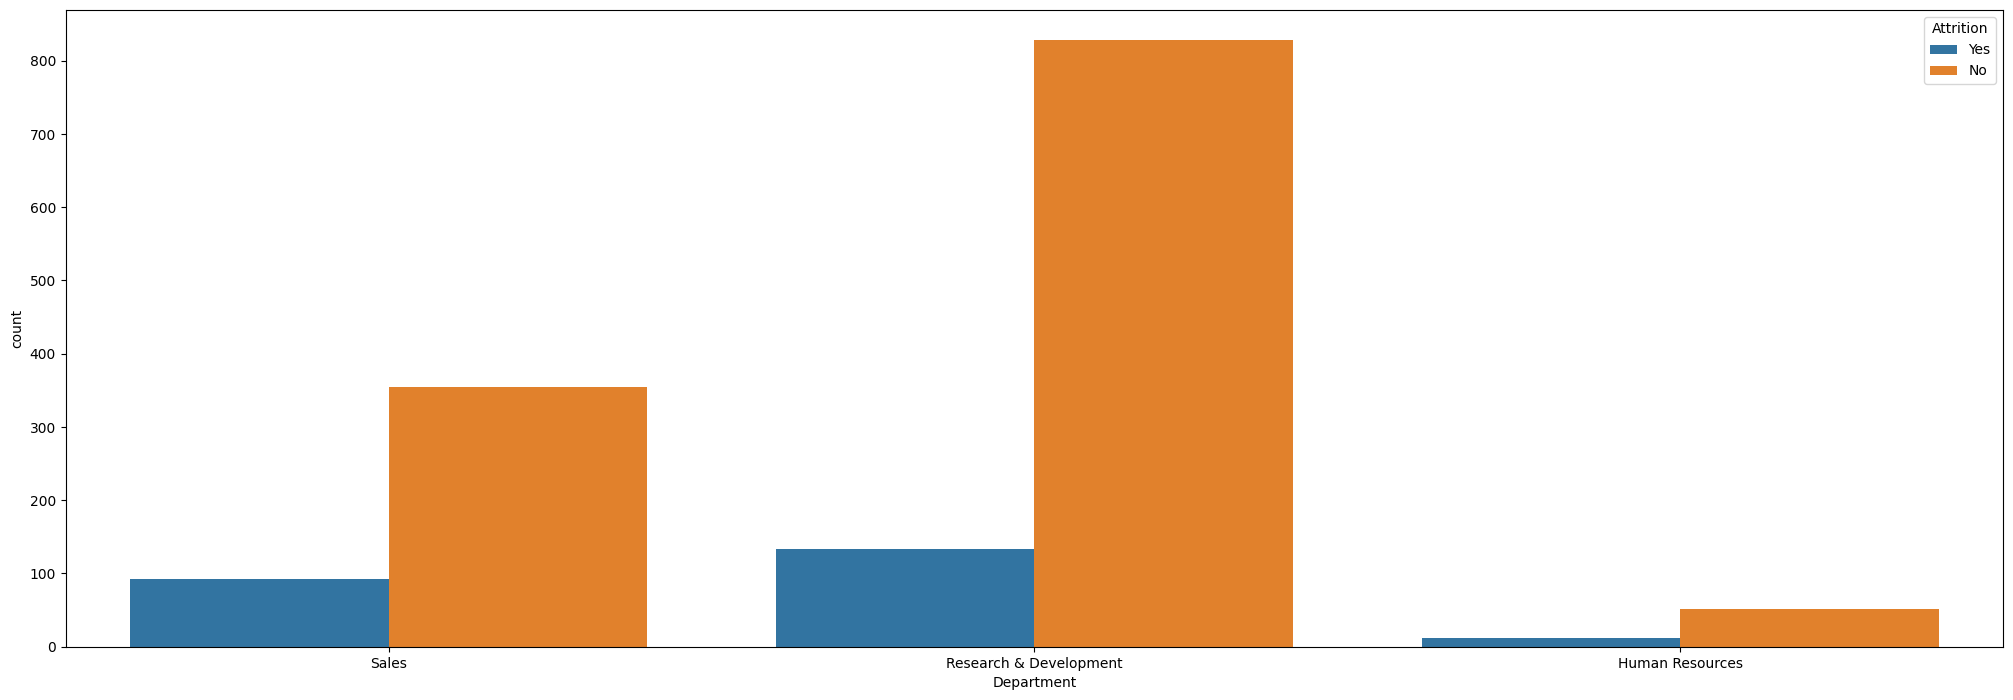

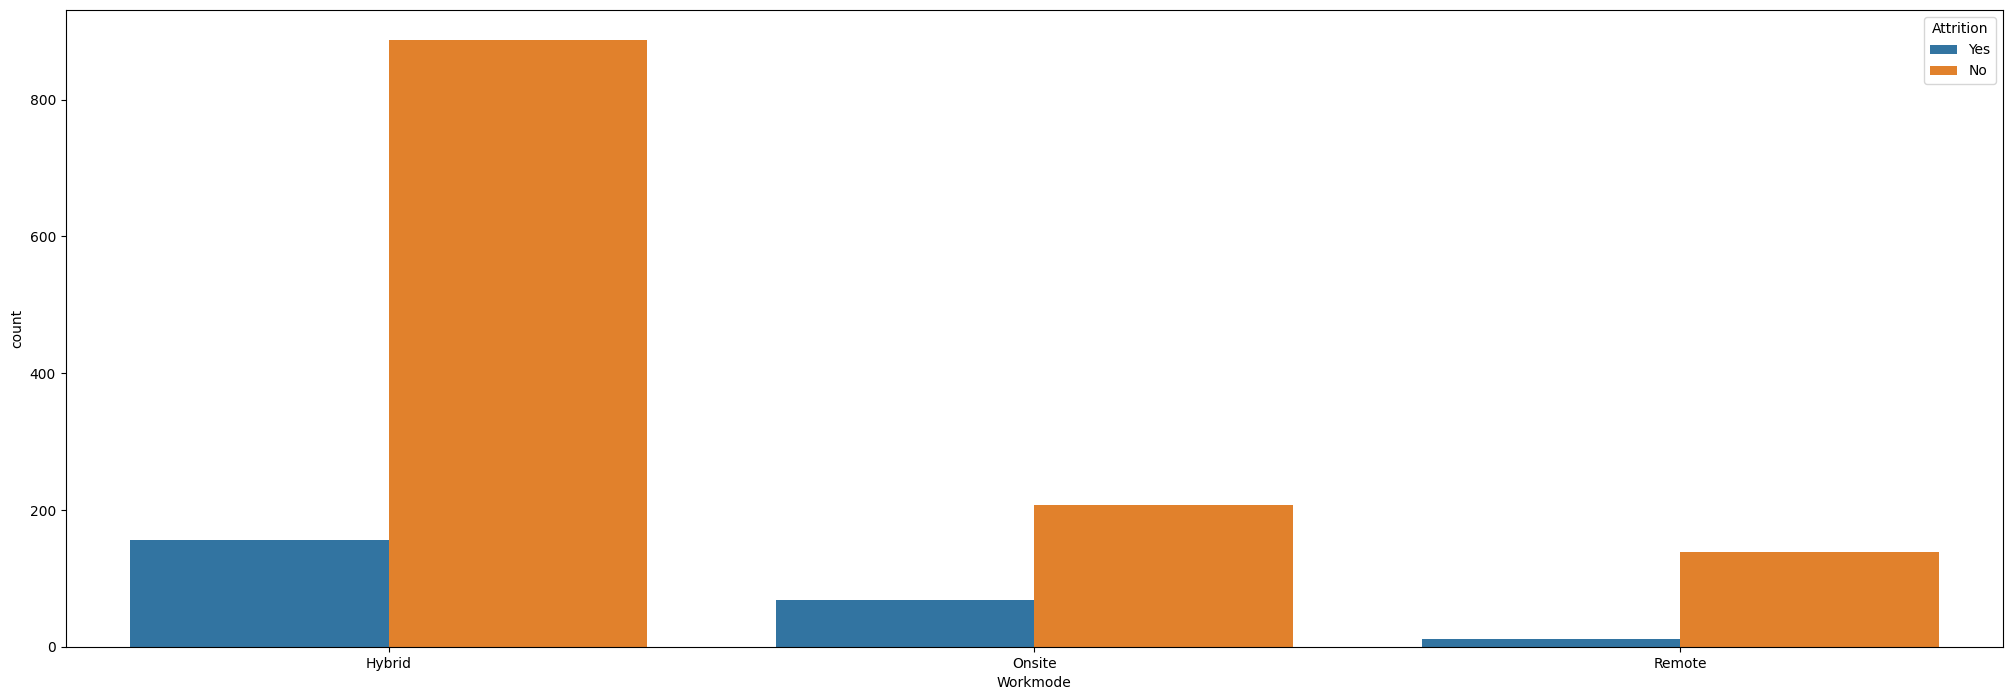

In [14]:
a4_dims = (25, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=df,x="JobRole",hue="Attrition", ax=ax )

a4_dims = (25, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=df,x="Department",hue="Attrition", ax=ax )

a4_dims = (25, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=df,x="Workmode",hue="Attrition", ax=ax )